# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
type(data.target)

numpy.ndarray

In [4]:
# Splitting our data and initializing a Scaler

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,random_state=42)

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
# Transforming our data

X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

X_train_s.shape #30 predictors

(426, 30)

In [6]:
X_train_s[:,:1] # 1st column

array([[-3.49138486e-01],
       [-2.04686647e-01],
       [-3.29311763e-01],
       [ 1.02740257e+00],
       [ 1.82896865e+00],
       [ 3.27802485e-01],
       [-9.70558648e-02],
       [ 2.76819483e-01],
       [-5.04919881e-01],
       [-1.67866188e+00],
       [-1.90524702e-01],
       [-7.93823558e-01],
       [ 2.30764239e+00],
       [ 1.49474675e+00],
       [-1.80215404e+00],
       [ 2.08842147e-01],
       [-8.47638949e-01],
       [-1.24700580e+00],
       [-1.27929503e+00],
       [-1.14503979e+00],
       [-4.42607323e-01],
       [ 2.85316650e-01],
       [-1.03174423e+00],
       [-3.80294765e-01],
       [ 1.74853479e-01],
       [-1.19488984e+00],
       [-8.57263088e-02],
       [-3.49138486e-01],
       [-1.08385421e-01],
       [-2.13183814e-01],
       [ 1.60691534e-01],
       [-3.43473708e-01],
       [-1.42374089e-01],
       [ 9.14107008e-01],
       [ 2.48495593e-01],
       [-6.57868886e-01],
       [ 1.15373310e-01],
       [-1.16882588e-01],
       [-7.8

In [7]:
X_train_s[:1,:] #1st row

array([[-0.34913849, -1.43851335, -0.41172595, -0.39047943, -1.86366229,
        -1.26860704, -0.82617052, -0.95286585, -1.72936805, -0.9415409 ,
        -0.86971355, -1.35865347, -0.83481506, -0.57230673, -0.74586846,
        -0.65398319, -0.52583524, -0.94677147, -0.53781728, -0.63449458,
        -0.54268486, -1.65565452, -0.58986401, -0.52555985, -1.51066925,
        -0.89149994, -0.75021715, -0.91671059, -0.92508585, -0.80841115]])

## Constructing a Neural Network in Keras

In [6]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

#import our optimizer

from keras.optimizers import Adam #we choose Adam as our gradient descent optimization algorithm

Using TensorFlow backend.


In [7]:
# Constructing and compiling our model

model = Sequential()

inputs = X_train_s.shape[1]

hiddens = inputs #so that we have same # of inputs into hidden layer as # of neurons

model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1,activation='sigmoid')) #adding a layer with 1 neuron in it,
adam = Adam()

model.compile(optimizer=adam, loss='mean_squared_error') #bundling layers, optimizer, and loss function together

In [9]:
# Fitting our model

model.fit(X_train_s, y_train, 
          validation_data = (X_test_s, y_test), epochs=100) #epochs = # of times we pass data through model


Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 86us/step - loss: 0.0057 - val_loss: 0.0174
Epoch 2/100
426/426 [==============================] - 0s 61us/step - loss: 0.0056 - val_loss: 0.0174
Epoch 3/100
426/426 [==============================] - 0s 56us/step - loss: 0.0056 - val_loss: 0.0176
Epoch 4/100
426/426 [==============================] - 0s 94us/step - loss: 0.0055 - val_loss: 0.0175
Epoch 5/100
426/426 [==============================] - 0s 118us/step - loss: 0.0055 - val_loss: 0.0175
Epoch 6/100
426/426 [==============================] - 0s 100us/step - loss: 0.0054 - val_loss: 0.0175
Epoch 7/100
426/426 [==============================] - 0s 95us/step - loss: 0.0054 - val_loss: 0.0178
Epoch 8/100
426/426 [==============================] - 0s 86us/step - loss: 0.0053 - val_loss: 0.0178
Epoch 9/100
426/426 [==============================] - 0s 109us/step - loss: 0.0053 - val_loss: 0.0178
Epoch 10/100
426/426 [===========

426/426 [==============================] - 0s 63us/step - loss: 0.0033 - val_loss: 0.0197
Epoch 81/100
426/426 [==============================] - 0s 59us/step - loss: 0.0033 - val_loss: 0.0202
Epoch 82/100
426/426 [==============================] - 0s 73us/step - loss: 0.0033 - val_loss: 0.0199
Epoch 83/100
426/426 [==============================] - 0s 73us/step - loss: 0.0033 - val_loss: 0.0200
Epoch 84/100
426/426 [==============================] - 0s 91us/step - loss: 0.0033 - val_loss: 0.0199
Epoch 85/100
426/426 [==============================] - 0s 84us/step - loss: 0.0033 - val_loss: 0.0200
Epoch 86/100
426/426 [==============================] - 0s 78us/step - loss: 0.0033 - val_loss: 0.0200
Epoch 87/100
426/426 [==============================] - 0s 80us/step - loss: 0.0032 - val_loss: 0.0201
Epoch 88/100
426/426 [==============================] - 0s 94us/step - loss: 0.0032 - val_loss: 0.0199
Epoch 89/100
426/426 [==============================] - 0s 85us/step - loss: 0.0032 - 

In [11]:
# Storing that fit as a history log

history_log = model.fit(X_train_s, y_train, 
          validation_data = (X_test_s, y_test), epochs=100)

Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 72us/step - loss: 0.0032 - val_loss: 0.0202
Epoch 2/100
426/426 [==============================] - 0s 62us/step - loss: 0.0031 - val_loss: 0.0206
Epoch 3/100
426/426 [==============================] - 0s 52us/step - loss: 0.0031 - val_loss: 0.0206
Epoch 4/100
426/426 [==============================] - 0s 69us/step - loss: 0.0031 - val_loss: 0.0207
Epoch 5/100
426/426 [==============================] - 0s 106us/step - loss: 0.0031 - val_loss: 0.0209
Epoch 6/100
426/426 [==============================] - 0s 88us/step - loss: 0.0030 - val_loss: 0.0207
Epoch 7/100
426/426 [==============================] - 0s 103us/step - loss: 0.0030 - val_loss: 0.0210
Epoch 8/100
426/426 [==============================] - 0s 98us/step - loss: 0.0030 - val_loss: 0.0212
Epoch 9/100
426/426 [==============================] - 0s 89us/step - loss: 0.0030 - val_loss: 0.0211
Epoch 10/100
426/426 [============

426/426 [==============================] - 0s 72us/step - loss: 0.0026 - val_loss: 0.0234
Epoch 81/100
426/426 [==============================] - 0s 72us/step - loss: 0.0026 - val_loss: 0.0232
Epoch 82/100
426/426 [==============================] - 0s 80us/step - loss: 0.0026 - val_loss: 0.0233
Epoch 83/100
426/426 [==============================] - 0s 69us/step - loss: 0.0026 - val_loss: 0.0235
Epoch 84/100
426/426 [==============================] - 0s 108us/step - loss: 0.0026 - val_loss: 0.0233
Epoch 85/100
426/426 [==============================] - 0s 93us/step - loss: 0.0026 - val_loss: 0.0233
Epoch 86/100
426/426 [==============================] - 0s 106us/step - loss: 0.0026 - val_loss: 0.0235
Epoch 87/100
426/426 [==============================] - 0s 121us/step - loss: 0.0026 - val_loss: 0.0237
Epoch 88/100
426/426 [==============================] - 0s 134us/step - loss: 0.0026 - val_loss: 0.0238
Epoch 89/100
426/426 [==============================] - 0s 99us/step - loss: 0.002

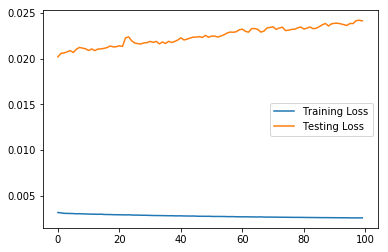

In [12]:
# Plotting our losses

train_loss = history_log.history['loss']
test_loss = history_log.history['val_loss']

plt.plot(train_loss, label = 'Training Loss')
plt.plot(test_loss, label = 'Testing Loss')

plt.legend();

In [13]:
model

In [14]:
model.predict(X_test_s)

array([[ 8.1122059e-01],
       [-6.5940738e-02],
       [ 6.5286160e-03],
       [ 1.1167794e+00],
       [ 1.0527958e+00],
       [ 1.1017278e-02],
       [-1.2869556e-01],
       [ 3.6119211e-01],
       [ 3.6205959e-01],
       [ 8.9337200e-01],
       [ 7.5345027e-01],
       [ 1.8943335e-01],
       [ 9.9714112e-01],
       [ 4.1496080e-01],
       [ 1.0519683e+00],
       [ 1.8509902e-01],
       [ 1.0330411e+00],
       [ 1.2033768e+00],
       [ 7.6311010e-01],
       [ 6.9122091e-02],
       [ 5.9781444e-01],
       [ 9.9003321e-01],
       [ 1.3000622e-02],
       [ 9.4326270e-01],
       [ 9.5422477e-01],
       [ 4.6568465e-01],
       [ 1.1182590e+00],
       [ 8.8423872e-01],
       [ 1.1467116e+00],
       [-2.8825298e-02],
       [ 9.8053533e-01],
       [ 1.0687771e+00],
       [ 7.4095690e-01],
       [ 8.7167937e-01],
       [ 1.0065386e+00],
       [ 9.2904854e-01],
       [ 1.6755654e-01],
       [ 9.2700094e-01],
       [-2.2698656e-02],
       [ 1.0361964e+00],


In [29]:
model.predict_proba(X_test_s)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


array([[ 8.1122059e-01],
       [-6.5940738e-02],
       [ 6.5286160e-03],
       [ 1.1167794e+00],
       [ 1.0527958e+00],
       [ 1.1017278e-02],
       [-1.2869556e-01],
       [ 3.6119211e-01],
       [ 3.6205959e-01],
       [ 8.9337200e-01],
       [ 7.5345027e-01],
       [ 1.8943335e-01],
       [ 9.9714112e-01],
       [ 4.1496080e-01],
       [ 1.0519683e+00],
       [ 1.8509902e-01],
       [ 1.0330411e+00],
       [ 1.2033768e+00],
       [ 7.6311010e-01],
       [ 6.9122091e-02],
       [ 5.9781444e-01],
       [ 9.9003321e-01],
       [ 1.3000622e-02],
       [ 9.4326270e-01],
       [ 9.5422477e-01],
       [ 4.6568465e-01],
       [ 1.1182590e+00],
       [ 8.8423872e-01],
       [ 1.1467116e+00],
       [-2.8825298e-02],
       [ 9.8053533e-01],
       [ 1.0687771e+00],
       [ 7.4095690e-01],
       [ 8.7167937e-01],
       [ 1.0065386e+00],
       [ 9.2904854e-01],
       [ 1.6755654e-01],
       [ 9.2700094e-01],
       [-2.2698656e-02],
       [ 1.0361964e+00],


In [30]:
model.predict_classes(X_test_s)

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

## Tensorflow

In [15]:
a = 3
b = 5
c = a+b
c

8

In [16]:
a += 1

In [17]:
a

4

In [18]:
c

8

- VARIABLE DEPENDENCIES ARE NOT UPDATED IN REAL TIME, C is still 8, BUT HOW DO WE MAKE C = WHATEVER A+B EQUALS WHENEVER WE MAKE A CHANGE TO A or B

In [19]:
import tensorflow as tf

### Tensorflow as a graph constructor

In [20]:
# Constructing the graph

a = tf.Variable(3)
b = tf.Variable(5)

c = a + b
d = a + c * b

In [21]:
# Starting a session

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(d)

In [22]:
# Printing the output
d

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [23]:
print(result) #3 + 8 * 5

43


In [24]:
a = tf.Variable(4)
b = tf.Variable(5)

c = a + b
d = a + c * b

In [25]:
print(result)

43


### Neural Network can also be done in BASE TENSORFLOW (less user friendly)

In [26]:
X_train_s.shape

(426, 30)

In [27]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [28]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_s, 
                                          y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test_s})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.986013986013986